In [1]:
import os
import numpy as np
import mne
from constants import *
import raw_data_analysis as rda
from mne_features.univariate import compute_pow_freq_bands
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import classification as cl
from scipy import stats
import glob
from sklearn.ensemble import RandomForestClassifier

FREQ_BANDS = [8, 12, 25]

pygame 2.1.0 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
Recordings=glob.glob("./recordings/2022-01-18*/raw.fif")
all_epochs=[]
for fname in Recordings:
    raw = mne.io.read_raw_fif(fname, preload=True)
    raw = rda.set_reference_digitization(raw)
    raw_csd = rda.apply_filters(raw)
    raw_csd = rda.perform_ICA(raw_csd)
    stim_dur = 4
    epochs = rda.get_epochs(raw_csd, stim_dur)
    all_epochs.append(epochs)


Opening raw data file ./recordings\2022-01-18--10-49-37_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 23030 =      0.000 ...   184.240 secs
Ready.
Reading 0 ... 23030  =      0.000 ...   184.240 secs...
Projections have already been applied. Setting proj attribute to True.
Setting up band-stop filter from 24 - 26 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 24.44
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 24.19 Hz)
- Upper passband edge: 25.56 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 25.81 Hz)
- Filter length: 825 samples (6.600 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------


c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--11-03-29_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 23206 =      0.000 ...   185.648 secs
Ready.
Reading 0 ... 23206  =      0.000 ...   185.648 secs...
Projections have already been applied. Setting proj attribute to True.
Setting up band-stop filter

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (1.6e-26) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


Origin head coordinates:      0.8 8.0 47.6 mm
Origin device coordinates:    0.8 8.0 47.6 mm
Fitting ICA to data using 16 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data f

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (1e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


Fitting ICA to data using 16 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--11-11-00_ori\raw.fif...
    Read a total of 1 projection items:

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (1.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--11-14-32_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 23085 =      0.0

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (4.3e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 8
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


Fitted sphere radius:         91.4 mm
Origin head coordinates:      0.8 8.0 47.6 mm
Origin device coordinates:    0.8 8.0 47.6 mm
Fitting ICA to data using 16 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (2.4e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 8
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


Fitting ICA to data using 16 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--12-41-06_ori\raw.fif...
    Read a total of 1 projection items:

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (4.8e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 9
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


Fitted sphere radius:         91.4 mm
Origin head coordinates:      0.8 8.0 47.6 mm
Origin device coordinates:    0.8 8.0 47.6 mm
Fitting ICA to data using 16 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (2.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 6
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


Origin head coordinates:      0.8 8.0 47.6 mm
Origin device coordinates:    0.8 8.0 47.6 mm
Fitting ICA to data using 16 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data f

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (5.7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 6
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


Fitted sphere radius:         91.4 mm
Origin head coordinates:      0.8 8.0 47.6 mm
Origin device coordinates:    0.8 8.0 47.6 mm
Fitting ICA to data using 16 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 6
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


Origin head coordinates:      0.8 8.0 47.6 mm
Origin device coordinates:    0.8 8.0 47.6 mm
Fitting ICA to data using 16 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped


c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (6.7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 6
  ica.fit(raw)


In [3]:
epochs_standard = mne.concatenate_epochs(all_epochs)
epochs_standard

Not setting metadata
Not setting metadata
300 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped


Number of events,300
Events,Idle: 100Left: 100Right: 100
Time range,0.000 – 4.000 sec
Baseline,0.000 – 0.000 sec


In [4]:
l_R = epochs_standard['Right'].average()
l_L = epochs_standard['Left'].average()
l_I = epochs_standard['Idle'].average()

right


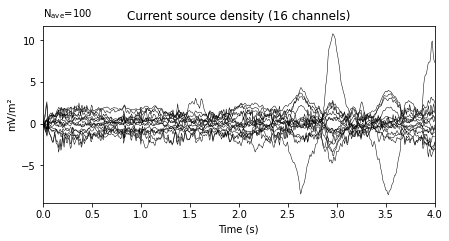

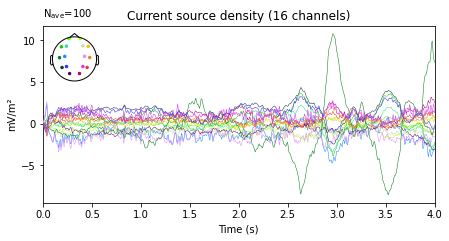

Left


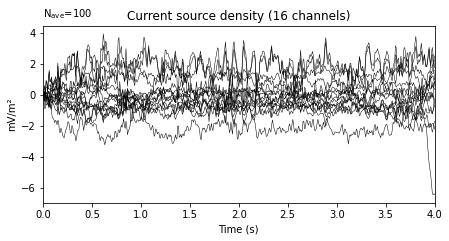

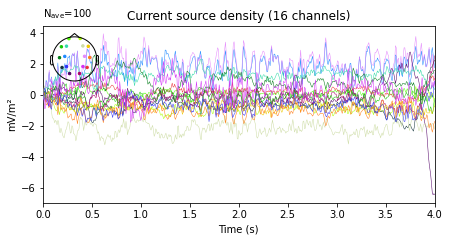

Idle


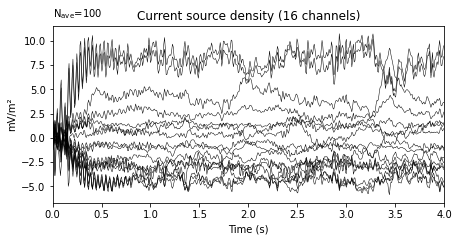

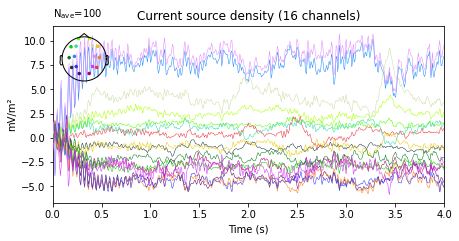

In [5]:
print("right")
fig1 = l_R.plot()
fig2 = l_R.plot(spatial_colors=True)

print("Left")
fig1 = l_L.plot()
fig2 = l_L.plot(spatial_colors=True)

print("Idle")
fig1 = l_I.plot()
fig2 = l_I.plot(spatial_colors=True)

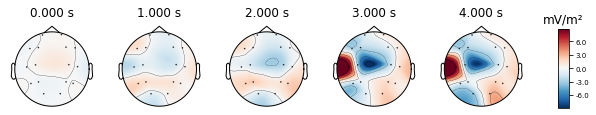

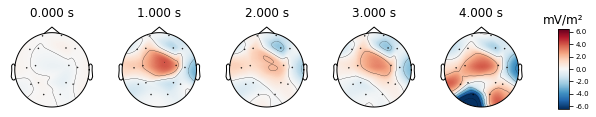

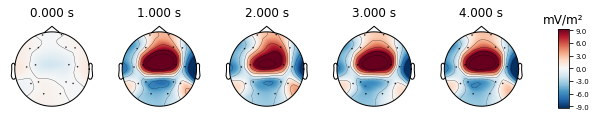

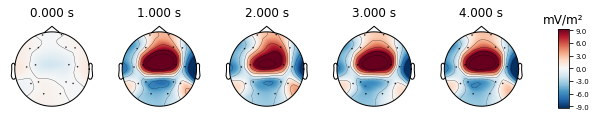

In [6]:
l_R.plot_topomap(times=[0, 1, 2,3,4], average=0.05)
l_L.plot_topomap(times=[0, 1, 2,3,4], average=0.05)
l_I.plot_topomap(times=[0, 1, 2,3,4], average=0.05)

Projections have already been applied. Setting proj attribute to True.


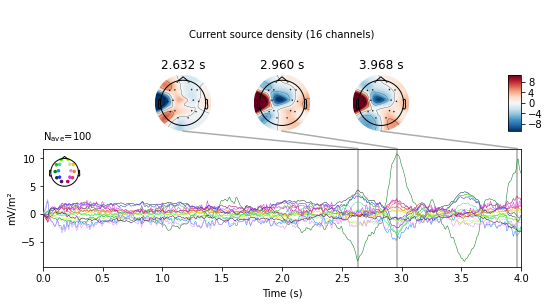

Projections have already been applied. Setting proj attribute to True.


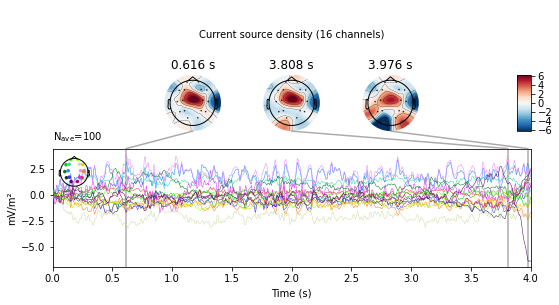

Projections have already been applied. Setting proj attribute to True.


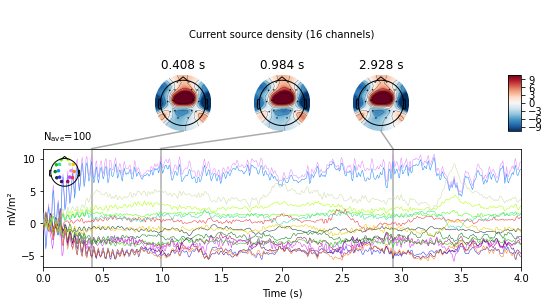

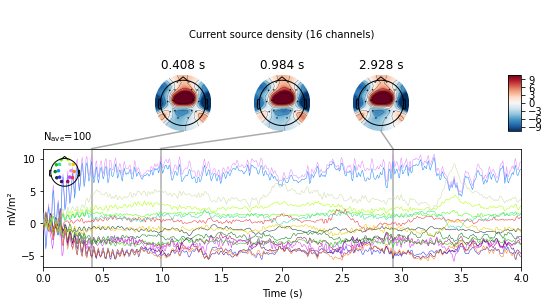

In [7]:
l_R.plot_joint()
l_L.plot_joint()
l_I.plot_joint()

Global field power is, generally speaking, a measure of agreement of the signals picked up by all sensors across the entire scalp: if all sensors have the same value at a given time point, the GFP will be zero at that time point; if the signals differ, the GFP will be non-zero at that time point. GFP peaks may reflect “interesting” brain activity, warranting further investigation. Mathematically, the GFP is the population standard deviation across all sensors, calculated separately for every time point.

Global field power


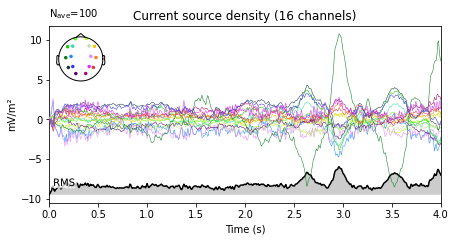

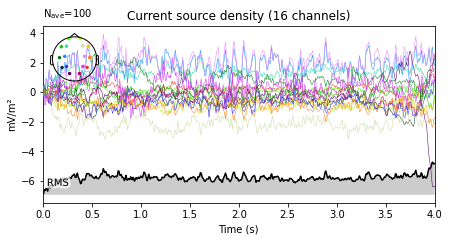

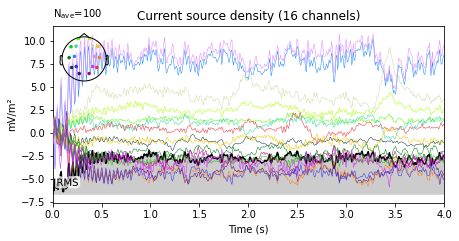

In [8]:
print("Global field power")
for evk in (l_R, l_L,l_I):
    evk.plot(gfp=True, spatial_colors=True, ylim=dict(eeg=[-12, 12]))

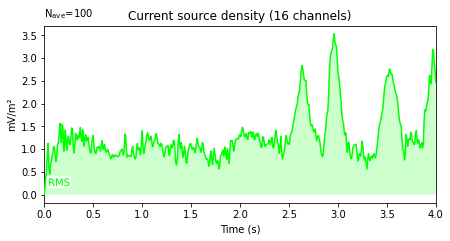

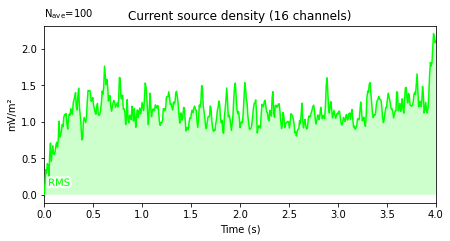

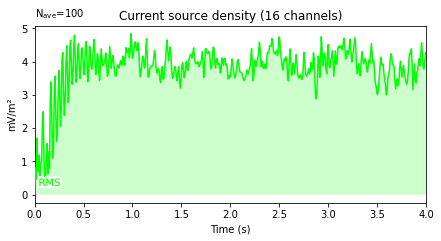

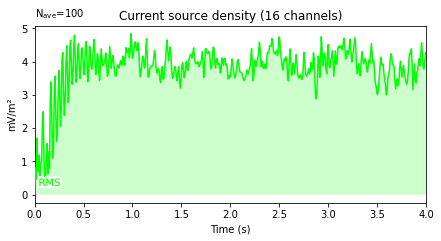

In [9]:
l_R.plot(gfp='only')
l_L.plot(gfp='only')
l_I.plot(gfp='only')

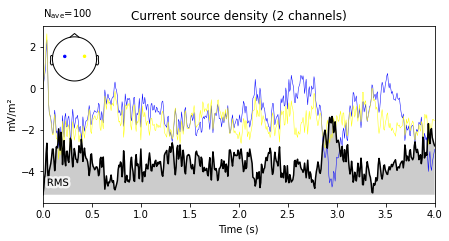

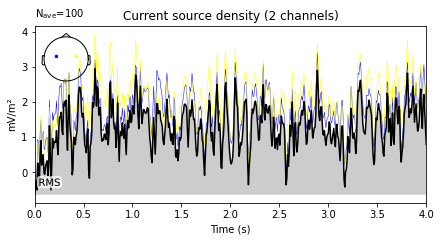

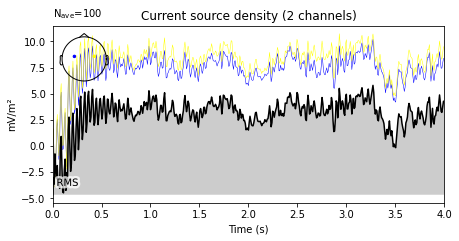

In [10]:
epochs_standard.pick_channels(['C3', 'C4'])
l_R_onlyC = epochs_standard['Right'].average()
l_L_onlyC = epochs_standard['Left'].average()
l_I_onlyC = epochs_standard['Idle'].average()
for evk in (l_R_onlyC, l_L_onlyC,l_I_onlyC):
    evk.plot(gfp=True, spatial_colors=True, ylim=dict(eeg=[-12, 12]))

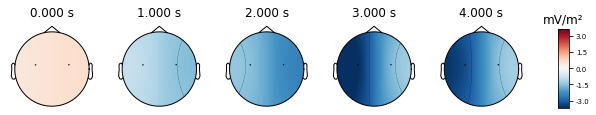

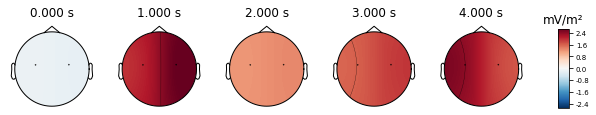

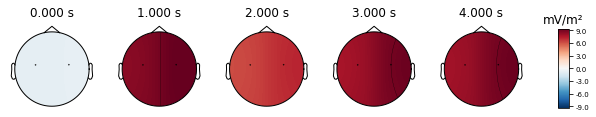

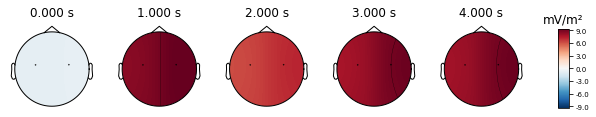

In [11]:
l_R_onlyC.plot_topomap(times=[0, 1, 2,3,4], average=0.05)
l_L_onlyC.plot_topomap(times=[0, 1, 2,3,4], average=0.05)
l_I_onlyC.plot_topomap(times=[0, 1, 2,3,4], average=0.05)

ERP- maximal peak

In [12]:
# Define a function to print out the channel (ch) containing the
# peak latency (lat; in msec) and amplitude (amp, in µV), with the
# time range (tmin and tmax) that were searched.
# This function will be used throughout the remainder of the tutorial
def print_peak_measures(ch, tmin, tmax, lat, amp):
    print(f'Channel: {ch}')
    print(f'Time Window: {tmin * 1e3:.3f} - {tmax * 1e3:.3f} ms')
    print(f'Peak Latency: {lat * 1e3:.3f} ms')
    print(f'Peak Amplitude: {amp * 1e6:.3f} µV')


# Get peak amplitude and latency from a good time window that contains the peak
good_tmin, good_tmax = 0, 4
ch, lat, amp = l_R_onlyC.get_peak( tmin=good_tmin, tmax=good_tmax,
                              mode='abs', return_amplitude=True)
# Print output from the good time window that contains the peak
print('** PEAK MEASURES FROM A GOOD TIME WINDOW Right**')
print_peak_measures(ch, good_tmin, good_tmax, lat, amp)


ch, lat, amp = l_L_onlyC.get_peak( tmin=good_tmin, tmax=good_tmax,
                              mode='abs', return_amplitude=True)
print('** PEAK MEASURES FROM A GOOD TIME WINDOW Left**')
print_peak_measures(ch, good_tmin, good_tmax, lat, amp)


ch, lat, amp = l_I_onlyC.get_peak( tmin=good_tmin, tmax=good_tmax,
                              mode='abs', return_amplitude=True)
print('** PEAK MEASURES FROM A GOOD TIME WINDOW Idle**')
print_peak_measures(ch, good_tmin, good_tmax, lat, amp)

** PEAK MEASURES FROM A GOOD TIME WINDOW Right**
Channel: C3
Time Window: 0.000 - 4000.000 ms
Peak Latency: 2952.000 ms
Peak Amplitude: -4758.822 µV
** PEAK MEASURES FROM A GOOD TIME WINDOW Left**
Channel: C4
Time Window: 0.000 - 4000.000 ms
Peak Latency: 616.000 ms
Peak Amplitude: 3947.850 µV
** PEAK MEASURES FROM A GOOD TIME WINDOW Idle**
Channel: C4
Time Window: 0.000 - 4000.000 ms
Peak Latency: 2928.000 ms
Peak Amplitude: 10734.271 µV


ERP- mean amplitude

In [13]:

l_R_mean_roi = l_R_onlyC.copy().crop(tmin=good_tmin, tmax=good_tmax)
l_L_mean_roi = l_L_onlyC.copy().crop(tmin=good_tmin, tmax=good_tmax)
l_I_mean_roi = l_I_onlyC.copy().crop(tmin=good_tmin, tmax=good_tmax)


# Extract mean amplitude in µV over time
mean_amp_roi = l_R_mean_roi.data.mean(axis=1) * 1e6
print("Right",mean_amp_roi)
mean_amp_roi = l_L_mean_roi.data.mean(axis=1) * 1e6
print("Left",mean_amp_roi)
mean_amp_roi = l_I_mean_roi.data.mean(axis=1) * 1e6
print("Idle",mean_amp_roi)

# # Store the data in a data frame
# mean_amp_roi_df = pd.DataFrame({
#     'ch_name': l_vis_mean_roi.ch_names,
#     'hemisphere': ['left', 'left', 'right', 'right'],
#     'mean_amp': mean_amp_roi
# })

# # Print the data frame
# print(mean_amp_roi_df.groupby('hemisphere').mean())

Right [-1291.35772604 -1571.40247175]
Left [1776.33648528 2022.43446339]
Idle [7227.54213666 8048.61536797]


In [14]:
Recordings=glob.glob("./recordings/2022-01-18*/raw.fif")
all_epochs=[]
for fname in Recordings[:-2]:
    raw = mne.io.read_raw_fif(fname, preload=True)
    raw = rda.set_reference_digitization(raw)
    raw_csd = rda.apply_filters(raw)
    raw_csd = rda.perform_ICA(raw_csd)
    stim_dur = 4
    epochs = rda.get_epochs(raw_csd, stim_dur)
    all_epochs.append(epochs)
epochs_standard = mne.concatenate_epochs(all_epochs)
epochs_standard.pick_channels(['C3', 'C4'])
classes = epochs_standard.events[:,2]

all_epochs_test=[]
for fname in Recordings[-2:]:
    print(fname)
    raw = mne.io.read_raw_fif(fname, preload=True)
    raw = rda.set_reference_digitization(raw)
    raw_csd = rda.apply_filters(raw)
    raw_csd = rda.perform_ICA(raw_csd)
    stim_dur = 4
    epochs = rda.get_epochs(raw_csd, stim_dur)
    all_epochs_test.append(epochs)
epochs_test = mne.concatenate_epochs(all_epochs_test)
epochs_test.pick_channels(['C3', 'C4'])
classes_test = epochs_test.events[:,2]

Opening raw data file ./recordings\2022-01-18--10-49-37_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 23030 =      0.000 ...   184.240 secs
Ready.
Reading 0 ... 23030  =      0.000 ...   184.240 secs...
Projections have already been applied. Setting proj attribute to True.
Setting up band-stop filter from 24 - 26 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 24.44
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 24.19 Hz)
- Upper passband edge: 25.56 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 25.81 Hz)
- Filter length: 825 samples (6.600 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------


c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--11-03-29_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 23206 =      0.000 ...   185.648 secs
Ready.
Reading 0 ... 23206  =      0.000 ...   185.648 secs...
Projections have already been applied. Setting proj attribute to True.
Setting up band-stop filter

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (1.6e-26) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--11-06-56_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 23205 =      0.000 ...   185.640 secs
Ready.
Reading 0 ... 23205  =      0.000 ...   185.6

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (1e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--11-11-00_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 23094 =      0.000 ...   184.752 secs
Ready.
Reading 0 ... 23094  =      0.000 ...   184.752 secs...
Projections have already been applied. Setting proj attribute to True.
Setting up band-stop filter

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (1.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--11-14-32_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 23085 =      0.000 ...   184.680 secs
Ready.
Reading 0 ... 23085  =      0.000 ...   184.680 secs...
Projections have already been applied. Setting proj attribute to True.
Setting up band-stop filter

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (4.3e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 8
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--12-36-52_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 22966 =      0.000 ...   183.728 secs
Ready.
Reading 0 ... 22966  =      0.000 ...   183.728 secs...
Projections have already been applied. Setting proj attribute to True.
Setting up band-stop filter

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (2.4e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 8
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--12-41-06_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 22909 =      0.000 ...   183.272 secs
Ready.
Reading 0 ... 22909  =      0.000 ...   183.272 secs...
Projections have already been applied. Setting proj attribute to True.
Setting up band-stop filter

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (4.8e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 9
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file ./recordings\2022-01-18--12-47-09_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 22905 =      0.000 ...   183.240 secs
Ready.
Reading 0 ... 22905  =      0.000 ...   183.240 secs...
Projections have already been applied. Setting proj attribute to True.
Setting up band-stop filter

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (2.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 6
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


Selecting by number: 14 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
./recordings\2022-01-18--12-50-35_ori\raw.fif
Opening raw data file ./recordings\2022-01-18--12-50-35_ori\raw.fif...
    Read a total of 1 projection items:
  

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (5.7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 6
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
./recordings\2022-01-18--12-57-46_ori\raw.fif
Opening raw data file ./recordings\2022-01-18--12-57-46_ori\raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16) active
    Range : 0 ... 22914 =      0.000 ...   183.312 secs
Ready.
Reading 0 ... 22914  =      0.000 ...   183.312 secs...
Projections have already been applied. Setting proj 

c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (1.6e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 6
  ica.fit(raw)
c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:35: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components
30 events found
Event IDs: [1 2 3]
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 30 events and 501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped


c:\Users\asus\OneDrive\BSC_brain_math\year_c\Yearly\BCI\BCI4ALS-python\raw_data_analysis.py:48: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (6.7e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 6
  ica.fit(raw)


In [24]:
def get_all_features(epochs):
    alpha_beta=get_alpha_beta(epochs)
    peaks=get_peak_epo(epochs)
    amps=get_mean_amp(epochs)
    all_features=np.concatenate((alpha_beta,peaks,amps),axis=1)
    #all_features=np.concatenate((peaks,amps),axis=1)
    return all_features

def get_alpha_beta(epochs):
    band_power = np.array([compute_pow_freq_bands(FS, epoch, FREQ_BANDS) for epoch in epochs])
    return np.nan_to_num(band_power)

def get_peak_epo(epochs):
    side_dict={'C3':0,'C4':1}
    features=[]
    for i in range(len(epochs)):
        ch,peak=epochs[i].average().get_peak()
        features.append([side_dict[ch],peak])
    return features
    
def get_mean_amp(epochs):
    features=[]
    for i in range(len(epochs)):
        features.append((epochs_standard[i].get_data().mean(axis=2) * 1e6)[0])
    return features

In [25]:
train_features=get_all_features(epochs_standard)
clf = LinearDiscriminantAnalysis()
clf.fit(train_features, classes)
pred_train = clf.predict(train_features)
print("on train",classification_report(pred_train,classes))

test_features=get_all_features(epochs_test)
pred_test = clf.predict(test_features)
print("on test",classification_report(pred_test,classes_test))

on train               precision    recall  f1-score   support

           1       0.30      0.35      0.32        69
           2       0.50      0.45      0.48        88
           3       0.46      0.45      0.45        83

    accuracy                           0.42       240
   macro avg       0.42      0.42      0.42       240
weighted avg       0.43      0.42      0.42       240

on test               precision    recall  f1-score   support

           1       0.25      0.24      0.24        21
           2       0.10      0.15      0.12        13
           3       0.45      0.35      0.39        26

    accuracy                           0.27        60
   macro avg       0.27      0.25      0.25        60
weighted avg       0.30      0.27      0.28        60



In [26]:
train_features=get_all_features(epochs_standard)
clf = RandomForestClassifier(max_depth=2,n_estimators=5,random_state=0)
clf.fit(train_features, classes)
pred_train = clf.predict(train_features)
print("on train",classification_report(pred_train,classes))

test_features=get_all_features(epochs_test)
pred_test = clf.predict(test_features)
print("on test",classification_report(pred_test,classes_test))

on train               precision    recall  f1-score   support

           1       0.65      0.49      0.56       107
           2       0.42      0.47      0.44        73
           3       0.42      0.57      0.49        60

    accuracy                           0.50       240
   macro avg       0.50      0.51      0.50       240
weighted avg       0.53      0.50      0.50       240

on test               precision    recall  f1-score   support

           1       0.30      0.33      0.32        18
           2       0.40      0.27      0.32        30
           3       0.15      0.25      0.19        12

    accuracy                           0.28        60
   macro avg       0.28      0.28      0.27        60
weighted avg       0.32      0.28      0.29        60

